<h1><b>Naive Bayes Classifier</b></h1>

[[0.58694845 0.43767048 0.22176856 0.3109781  0.46471269 0.98235023
  0.9752397  0.36881775 0.64867688 0.54630108]
 [0.94186051 0.38547788 0.95993035 0.64720965 0.54963427 0.4255767
  0.78090085 0.46332989 0.2941236  0.88650398]
 [0.10538546 0.21715393 0.7961762  0.86051991 0.03246042 0.16877535
  0.90155745 0.20066608 0.59767976 0.56949345]
 [0.66179381 0.17846332 0.45806291 0.52590243 0.32645193 0.69246088
  0.6922307  0.9222042  0.86370079 0.56051674]
 [0.66881564 0.4920345  0.51182692 0.37504255 0.20558758 0.10607379
  0.31700947 0.29958356 0.8912223  0.72082964]
 [0.70831387 0.05476354 0.47718666 0.96129246 0.61807997 0.69915047
  0.0945872  0.81452804 0.47779888 0.60951168]]


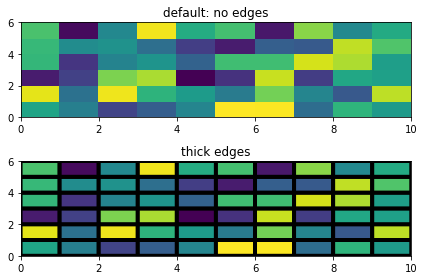

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm

Z = np.random.rand(6, 10)
print(Z)
fig, (ax0, ax1) = plt.subplots(2, 1)

c = ax0.pcolor(Z)
ax0.set_title('default: no edges')

c = ax1.pcolor(Z, edgecolors='k', linewidths=4)
ax1.set_title('thick edges')

fig.tight_layout()
plt.show()

In [ ]:
#Naive Bayes Classifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
size=100
def log_bayes(x,mean,var, prior):
    prob_class_given_x = []
    for i in range(3):
      prob_x_given_class = np.sum(np.log(1/(2 * np.pi * var[i,:]))) - np.sum(np.square((x - mean[i, :])) / ( var[i,:]) , 1)
      prob_class_given_x.append(prob_x_given_class+np.log(prior[i]))
    return np.array(prob_class_given_x).T
def prediction(arr):
  predicted=np.zeros(len(arr))
  for i in range(len(arr)):
    predicted[i]=np.argmax(arr[i])+1
  return predicted

mean1 = [1, 1]
cov1 = [[1, -.25], [-.25, 1]]
x1 = np.random.multivariate_normal(mean1, cov1, size).T
x1=x1.T
mean2 = [-2, 0]
cov2 = [[2, -.5], [-.5, 2]]
x2 = np.random.multivariate_normal(mean2, cov2, size).T
x2=x2.T
mean3 = [3, 3]
cov3 = [[-2, 5], [5,-2]]
x3 = np.random.multivariate_normal(mean3, cov3, size).T
x3=x3.T
x=np.vstack((x1,x2,x3))
y=np.ones(len(x))
y[size:2*size]=2
y[2*size:3*size]=3
var=np.vstack((np.var(x1,axis=0),np.var(x2,axis=0),np.var(x3,axis=0)))
means=np.vstack((mean1,mean2,mean3))
bayes=log_bayes(x,means,var,[1/3,1/3,1/3])
predicted=prediction(bayes)
print("Naive Bayes from Scratch")
print(predicted)
#compare with GaussianNB
clf = GaussianNB()
clf.fit(x, y)
print("Naive Bayes from sklearn")
sklBayes=clf.predict(x)
print(sklBayes)

print("The Naive Bayes classifier from scratch differes from the built in \n implementation for {} elements".format(np.count_nonzero(predicted-sklBayes)))
print("The Naive Bayes classifier from scratch is incorrect for {}% of \n the dataset".format((np.count_nonzero(y-predicted))/(5*size)*100))
print("The built-in Naive Bayes classifier is incorrect for {}% of the\n dataset".format((np.count_nonzero(sklBayes-predicted))/(5*size)*100))


Naive Bayes from Scratch
[1. 1. 1. 2. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 3. 1. 1. 1. 1. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 2. 1. 1. 1. 2. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 3. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 3. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 2. 1. 2. 2. 2. 2. 1. 2. 1. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 1. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 1. 3. 1. 3. 1. 3. 3. 3. 3. 3. 3. 1. 3. 3.
 3. 1. 3. 3. 3. 3. 3. 3. 1. 3. 3. 1. 3. 3. 3. 3. 3. 1. 3. 3. 1. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 1. 3. 3. 1. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 1. 3. 3. 3. 3. 3. 3. 1. 3. 3. 3. 3. 3. 1.
 3. 3. 3. 3. 3. 1. 1. 3. 3. 3. 3. 3.]
Naive Bayes from sklearn
[1. 1. 1. 2. 1. 2. 1. 1. 1. 1. 1. 1.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: covariance is not positive-semidefinite.


In [ ]:
#Naive Bayes Classifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
size=100
def log_bayes(x,mean,var, prior):
    prob_class_given_x = []
    for i in range(3):
      prob_x_given_class = np.sum(np.log(1/(2 * np.pi * var[i,:]))) - np.sum(np.square((x - mean[i, :])) / ( var[i,:]) , 1)
      prob_class_given_x.append(prob_x_given_class+np.log(prior[i]))
    return np.array(prob_class_given_x).T
def prediction(arr):
  predicted=np.zeros(len(arr))
  for i in range(len(arr)):
    predicted[i]=np.argmax(arr[i])+1
  return predicted

mean1 = [0, 0]
cov1 = [[1, -.25], [-.25, 1]]
x1 = np.random.multivariate_normal(mean1, cov1, 2*size).T
x1=x1.T
mean2 = [-5, -10]
cov2 = [[2, -.1], [-.1, 2]]
x2 = np.random.multivariate_normal(mean2, cov2, size).T
x2=x2.T
mean3 = [2, 3]
cov3 = [[-2, .7], [.7,-2]]
x3 = np.random.multivariate_normal(mean3, cov3, 3*size).T
x3=x3.T
x=np.vstack((x1,x2,x3))
y=np.ones(len(x))
y[2*size:3*size]=2
y[3*size:6*size]=3
var=np.vstack((np.var(x1,axis=0),np.var(x2,axis=0),np.var(x3,axis=0)))
means=np.vstack((mean1,mean2,mean3))
bayes=log_bayes(x,means,var,[2/5,1/5,3/5])
predicted=prediction(bayes)
print("Naive Bayes from Scratch")
print(predicted)
#compare with GaussianNB
clf = GaussianNB()
clf.fit(x, y)
print("Naive Bayes from sklearn")
sklBayes=clf.predict(x)
print(sklBayes)

print("The Naive Bayes classifier from scratch differs from the built in \nimplementation for {} elements".format(np.count_nonzero(predicted-sklBayes)))
print("The Naive Bayes classifier from scratch is incorrect for {}% of the \ndataset".format((np.count_nonzero(y-predicted))/(5*size)*100))
print("The built-in Naive Bayes classifier is incorrect for {}% of the \ndataset".format((np.count_nonzero(sklBayes-predicted))/(5*size)*100))

Naive Bayes from Scratch
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 3. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 3. 1. 1. 1. 1. 1. 1. 1. 3. 1. 1. 3. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 3. 1. 1. 1. 1. 1. 1. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 3. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: covariance is not positive-semidefinite.


In both tests the Naive Bayes classifier does not work as well as the built-in implementation